## EEG data of simple and compound limb motor imagery
There are ten files from ten subjects stored in three zip files: data1, data2 and data3.<br>
Each file contains EEG 'data' (Channel*Time*Trial) and labels.<br>
Data is from 64 channels. 560 trials, i.e. 560 =  80 x 7 classes each.<br>
So, eeg.shape == (64,1600,560).<br>
The data were band-pass filtered between 0.1 and 50Hz. <br>
Each EEG waveform is 8s long (1600 time points), <br>
sampling rate is 200Hz. There are 560 labels,  1-7 indicate <br>
left hand, right hand, both hands, feet, left hand combined with right foot, right hand <br>
combined with left foot and resting state respectively.<br>

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/27306 <br>


Change the accelerator from ```None``` to ```GPU```?

In [5]:
# author: peter-426

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
from scipy import signal
import scipy.io

print(tf.__version__)

2.8.0


In [6]:
PHYSIONET_ELECTRODES = { 
    1 : "FC5", 2 : "FC3", 3 : "FC1", 4 : "FCz", 5 : "FC2", 6 : "FC4", 
    7 : "FC6", 8 : "C5", 9 : "C3", 10: "C1", 11: "Cz", 12: "C2", 
    13: "C4", 14: "C6", 15: "CP5", 16: "CP3", 17: "CP1", 18: "CPz", 
    19: "CP2", 20: "CP4", 21: "CP6", 22: "Fp1", 23: "Fpz", 24: "Fp2",
    25: "AF7", 26: "AF3", 27: "AFz", 28: "AF4", 29: "AF8", 30: "F7", 
    31: "F5", 32: "F3", 33: "F1", 34: "Fz", 35: "F2", 36: "F4", 
    37: "F6", 38: "F8", 39: "FT7", 40: "FT8", 41: "T7", 42: "T8", 
    43: "T9", 44: "T10", 45: "TP7", 46: "TP8", 47: "P7", 48: "P5", 
    49: "P3", 50: "P1", 51: "Pz", 52: "P2", 53: "P4", 54: "P6", 
    55: "P8", 56: "PO7", 57: "PO3", 58: "POz", 59: "PO4", 60: "PO8",
    61: "O1", 62: "Oz", 63: "O2", 64: "Iz"
}

# Data Preprocessing

In [286]:
# load EEG data
mat = scipy.io.loadmat('data-motor-imagery/cl.mat')    

In [287]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'label'])

In [288]:
header = mat['__header__']
print(header)
globals = mat['__globals__']
print(globals)

b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sun Dec 29 13:54:13 2013'
[]


In [289]:
# for key, val in mat.items():
#     print(key, val)

In [290]:
eeg_array = mat['data']
label_array  = mat['label']

In [291]:
#print(eeg_array.shape)
#print(type(eeg_array))
#label_array[0:10]

In [292]:
commands = {1:'left hand', 2:'right hand', 3:'both hands', 4:'feet', 
5:'left hand combined with right foot', 6:'right hand combined with left foot', 7:'resting state'}

# plt.figure(figsize=(12,10))
# for ii in range(0,9):
#     plt.subplot(3,3,ii+1)
#     plt.plot(eeg_array[0,:,ii])
#     cmd = commands[label_array[ii,0]]
#     plt.title(cmd)
# plt.tight_layout(pad=2.0)

In [294]:
myparams = dict(nperseg = WinLength, noverlap = WinLength-step, return_onesided=True, mode='magnitude')
f, nseg, Sxx = signal.spectrogram(x = eeg, fs = sr, **myparams)

In [295]:
Sxx.shape

(17, 197)

In [296]:
print(f)
nseg.shape
#nseg

[  0.     6.25  12.5   18.75  25.    31.25  37.5   43.75  50.    56.25
  62.5   68.75  75.    81.25  87.5   93.75 100.  ]


(197,)

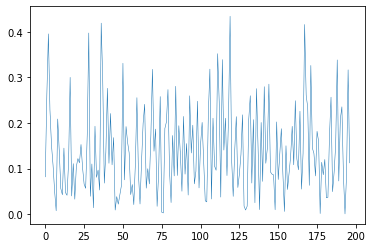

In [297]:
plt.plot(Sxx[0], lw=0.5)

([], [])

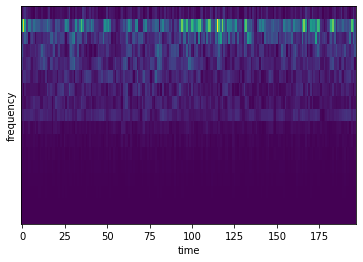

In [298]:

plt.imshow(Sxx, interpolation='nearest', aspect='auto')
plt.xlabel('time')
plt.ylabel("frequency")
plt.yticks([])


In [338]:
x_train=[]
y_train=[]

x_validation=[]
y_validation=[]

not_number_count=0
number_count=np.zeros(11)
    
num_rows=560     # trials 
num_channels=7

for ii in range(0,num_rows):
    
    if random.random() < 0.90:  # all channels for this trial will be training OR not training
        train_set = True
    else:
        train_set = False
        
    class_number = label_array[ii,0] - 1  # 7 classes were labelled 1-7, so -1 to label as 0 .. 6.
    if class_number < 0:
        not_number_count += 1
        continue
        
    number_count[int(class_number)] += 1
            
    chan = 6 # channel index 
    eeg = eeg_array[chan,:,ii]
    
    f, nseg, X_gram = signal.spectrogram(x = eeg, fs = sr, **myparams)
  
    if train_set:
        x_train.append(X_gram)
        y_train.append(class_number)  
    else:
        x_validation.append(X_gram)
        y_validation.append(class_number)  

In [340]:
print("X_gram shape: ", X_gram.shape)
print("length of eeg=", len(eeg))
print("number of exampes in data set=",len(x_train))
print("training x count =", len(x_train))
print("training y count =", len(y_train))
print("validation x count =", len(x_validation))
print("validation y count =", len(x_validation))
print("not number count=", not_number_count)
print("number count=", number_count)

X_gram shape:  (777,)
length of eeg= 1600
number of exampes in data set= 147
training x count = 147
training y count = 147
validation x count = 13
validation y count = 13
not number count= 0
number count= [80.  0.  0.  0.  0.  0. 80.  0.  0.  0.  0.]


In [305]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

<AxesSubplot:ylabel='count'>

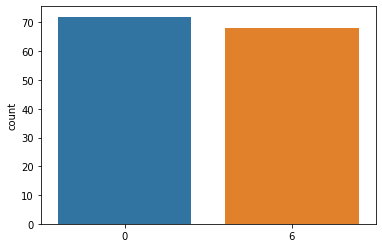

In [306]:
sns.countplot(y_train)

If similar counts for each digit, no need to downsample or upweigh.

## Check for NaN Values

In [307]:
print(np.isnan(x_train).any())
print(np.isnan(x_validation).any())

False
False


In [308]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)

(140, 17, 197)
(140,)
(20, 17, 197)


## Label Encoding

Convert categorical labels to one-hot encodings.

E.g., ```2``` is ```[0,0,1,0,0,0,0,0,0,0]``` and ```7``` is ```[0,0,0,0,0,0,0,1,0,0]```.

# CNN

## Define the Model

In [322]:
batch_size = 8
num_classes = 7
epochs = 50

The MaxPool1D filter aims to conserve the main features of the image while reducing the size.

Dropout layers: a percent of random nodes are ignored.

```relu``` returns input value if the input value >= 0, else it returns 0.

Flatten converts the tensors into a 1D vector.

The Dense layers are an ANN. Last layer outputs the probability that an EEG signal is in each class.

These models aims to categorize EEG signals, so it uses ```categorical_crossentropy``` loss function. 

In [323]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 25, padding='same', activation='relu', input_shape=(17,197,1)),
    tf.keras.layers.Conv2D(64, 25, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, 9, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 9, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [324]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

## Fit the Training Data

Stop train after n epochs or when training accuracy > threshold.

Next cell defines a CallBack. If xx.x% accuracy is achieved, the model stops training. 

In [325]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')> 0.75): #0.995):
      print("\nReached xx% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [326]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_validation, y_validation),      # validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/50
18/18 [==============================] - 27s 1s/step - loss: 35.5443 - acc: 0.5214 - val_loss: 0.6501 - val_acc: 0.5500
Epoch 2/50
18/18 [==============================] - 27s 1s/step - loss: 0.7929 - acc: 0.5429 - val_loss: 0.7653 - val_acc: 0.4000
Epoch 3/50
18/18 [==============================] - 28s 2s/step - loss: 0.7270 - acc: 0.5286 - val_loss: 0.7032 - val_acc: 0.5000
Epoch 4/50
18/18 [==============================] - 28s 2s/step - loss: 0.7013 - acc: 0.5571 - val_loss: 0.7417 - val_acc: 0.5000
Epoch 5/50
18/18 [==============================] - 28s 2s/step - loss: 0.7677 - acc: 0.5429 - val_loss: 0.7872 - val_acc: 0.4000
Epoch 6/50
18/18 [==============================] - 28s 2s/step - loss: 0.7112 - acc: 0.5429 - val_loss: 0.7547 - val_acc: 0.6000
Epoch 7/50
18/18 [==============================] - 28s 2s/step - loss: 0.9952 - acc: 0.5357 - val_loss: 0.6677 - val_acc: 0.7000
Epoch 8/50
18/18 [==============================] - 28s 2s/step - loss: 0.6985 - acc: 0.5

KeyboardInterrupt: 

# 4. Evaluate the Model

## Accuracy Curve

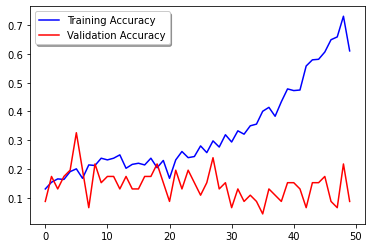

In [283]:
fig, ax = plt.subplots(1,1)
ax.plot(history.history['acc'], color='b', label="Training Accuracy")
ax.plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax.legend(loc='best', shadow=True)

## Predict Results

In [264]:
val_loss, val_acc = model.evaluate(x_validation, y_validation)

13/13 [==============================] - 0s 13ms/step - loss: 7.2359 - acc: 0.1811
